In [96]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms import bipartite

In [62]:
DATA = '../Data/out.moreno_crime_crime'
ROLE = '../Data/rel.moreno_crime_crime.person.role'
NAME = '../Data/ent.moreno_crime_crime.person.name'
SEX =  '../Data/ent.moreno_crime_crime.person.sex'

In [63]:
with open(DATA) as f:
    data = f.read().splitlines()
    
with open(ROLE) as f:
    role = f.read().splitlines()
    
with open(NAME) as f:
    name = f.read().splitlines()
    
with open(SEX) as f:
    sex = f.read().splitlines()

for i in range(len(data)):
    data[i] = 'c' + data[i]

In [64]:
E = nx.read_edgelist(data)

In [65]:
graph = np.loadtxt(DATA)
a = np.unique(graph[:,0])
b = np.unique(graph[:,1])
a = ['c' + str(int(a)) for a in a]
b = [str(int(b)) for b in b]
len(a), len(b)

(829, 551)

In [66]:
G = nx.Graph()
for j in range(len(a)):
    G.add_node(a[j], bipartite=0, data=True, name=name[j], sex=sex[j])
print(len(G.nodes()))
G.add_nodes_from(b, bipartite=1, data=True)
print(len(G.nodes())-829)

829
551


In [67]:
i = 0
for edge in E.edges():
    G.add_edge(edge[0], edge[1], weight= [role[i]])
    i+=1

len(G.nodes()), len(G.edges)

(1380, 1476)

In [68]:
#Check to see if it's truly bipartite
bipartite.is_bipartite(G)

True

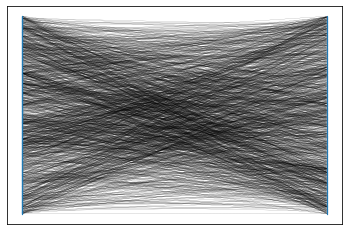

In [90]:
nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, a), width = 0.1, linewidths = 0.5, node_size = 0.5, scale = 0.5, with_labels = False)




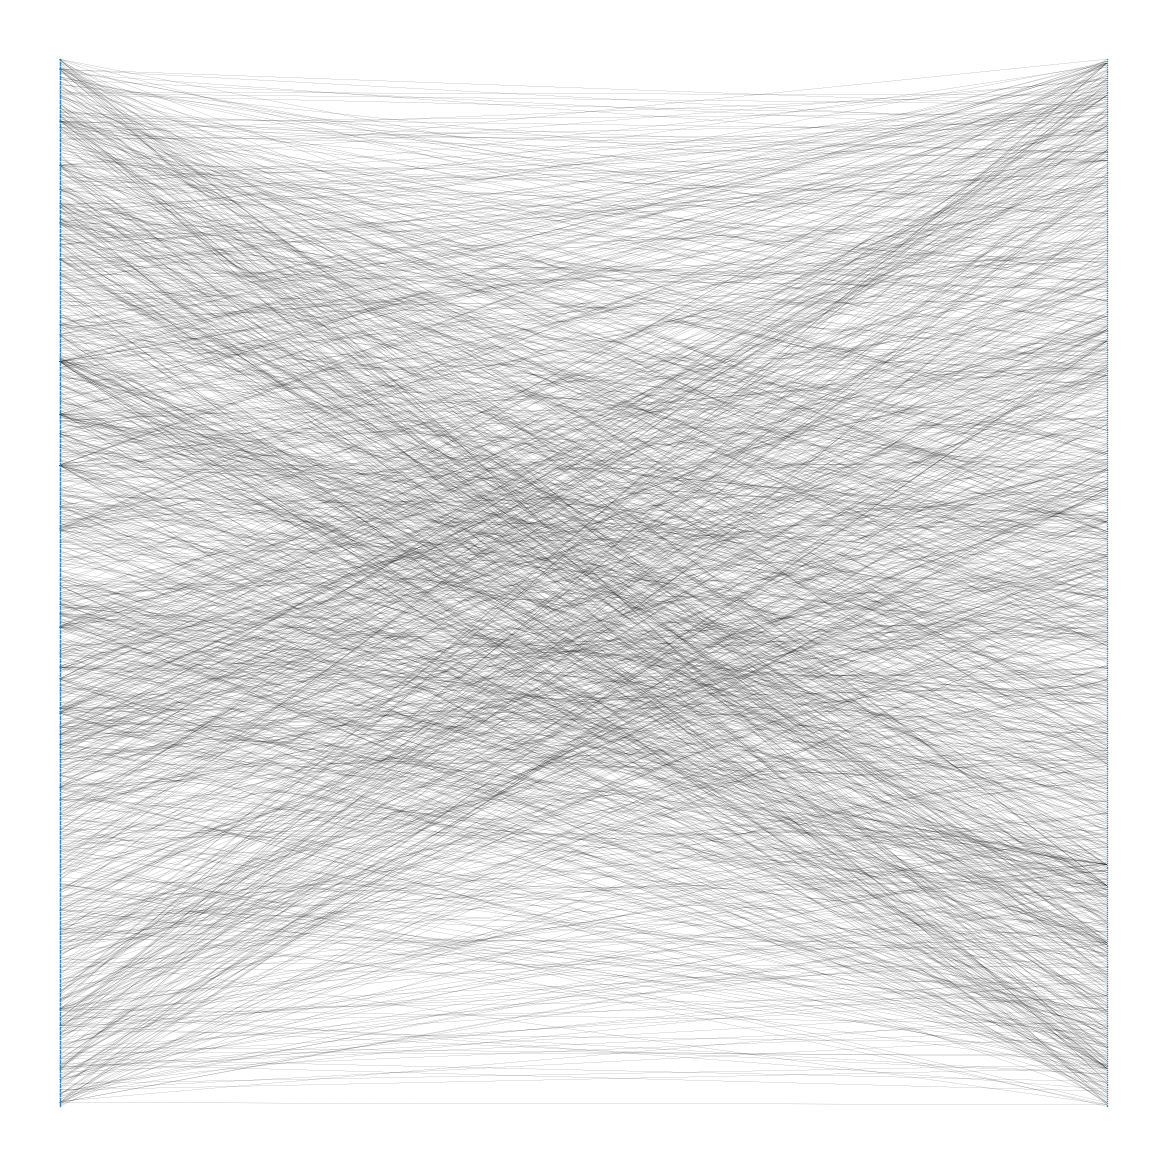

In [104]:
pos = nx.bipartite_layout(G, a)
plt.figure(3,figsize=(16,16))
nx.draw(G, pos, with_labels = False, node_size = 0.2, width = 0.1)
plt.show()